<div align="center">
<h1>Online Shoppers Intention</h1>
</div>

#### Problem Statement:

Based on given data of visitors browsing for online shopping, build different clusters to know whether person is only browsing and visiting multiples pages or also generating revenue for the shoppers as well.  Analyse and compare the clusters formed with the existing Revenue Column.


#### Data Set Information:
    
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.


#### Attribute Information:
The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.


"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 


#### Citation / Reference:
Please use the below link to cite this dataset:
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).
https://link.springer.com/article/10.1007/s00521-018-3523-0
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.


#### Expected Approach/Outcomes:
* Perform required cleaning to bring the uniformity in the data.
* Carry-out uni-variate, Bi-variate and Multti-varaiate analysis to understand the data relationships.
* Perform required missing value treatment
* Perform Outlier treatment if required
* Perform appropriate scaling
* Perform required encoding techniques
* Build the different cluster models.
* Analyse the optimum number of cluster using appropriate techniques.
* Make the appropriate business interpretation using the cluster centroids.
* Perform the EDA on cluster groups to understand the cluster characteristics.
* Perform PCA and apply clustering on top of it. Comment whether PCA is really helping the clustering process.  
* Also try different graphs to visualize the clusters and its characteristics. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')

In [16]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

There are 12330 rows and 18 columns

In [4]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

There are 7 int64 columns, 7 float64 columns, 2 object columns and 2 boolean columns

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [10]:
## Checking for missing values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [27]:
df['Revenue'] = df['Revenue'].replace({True: 1, False: 0})
df['Weekend'] = df['Weekend'].replace({True: 1, False: 0})

In [12]:
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                      int64
Revenue                      int64
dtype: object

We can see that there are no null values in the dataset

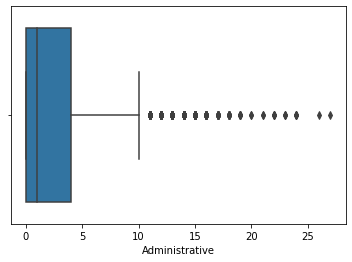

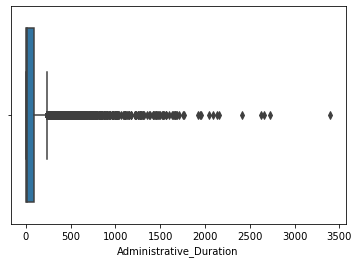

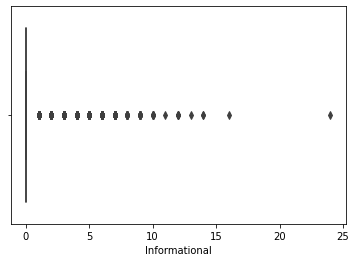

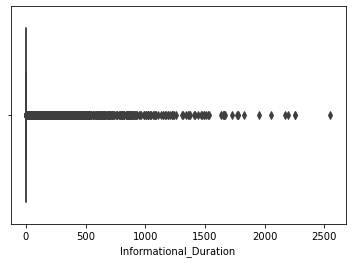

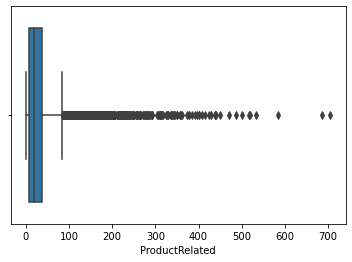

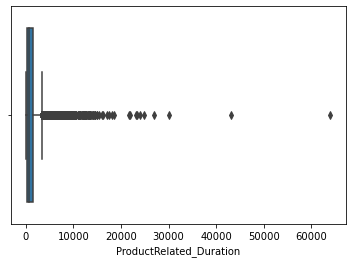

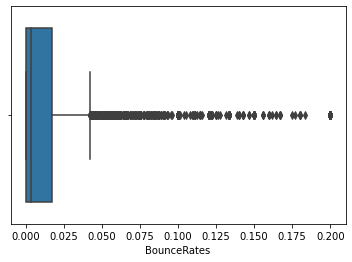

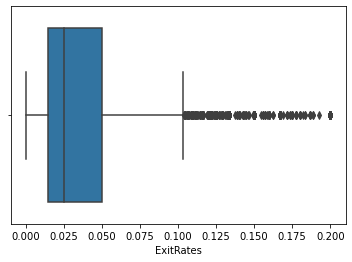

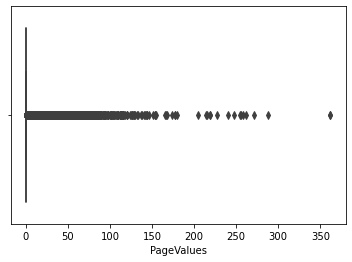

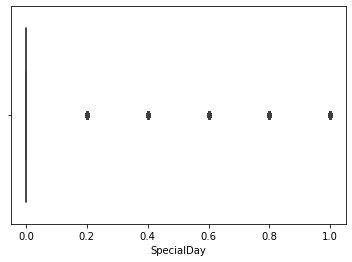

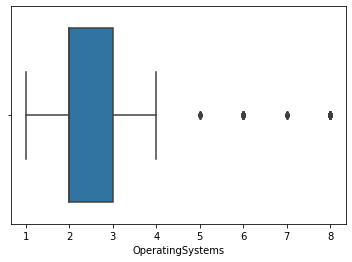

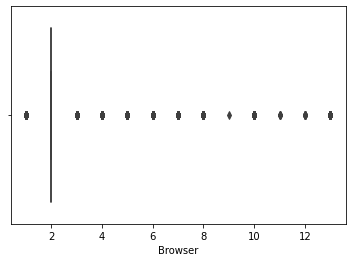

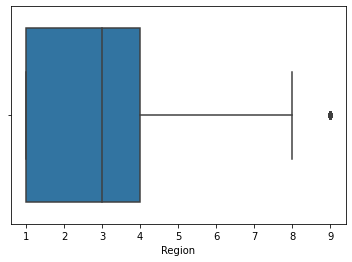

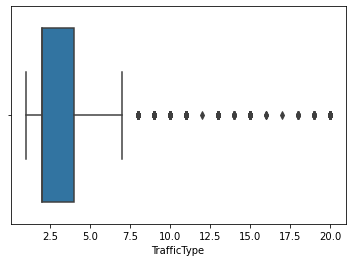

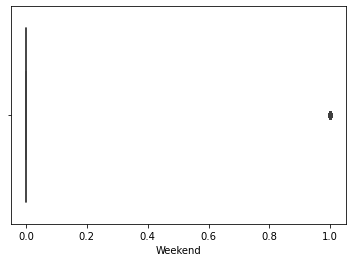

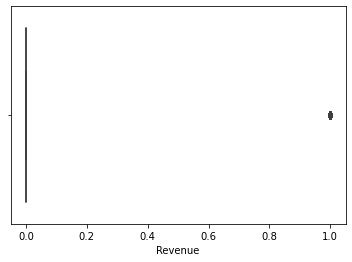

In [13]:
df_num = df.select_dtypes(include=np.number)

for i in df_num:
    sns.boxplot(x=df_num[i])
    plt.show()

In [14]:
## Removing outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < Q1 - 1.5 * IQR) | (df > Q3 + 1.5 * IQR)).any(axis=1)]

In [15]:
df.shape

(1914, 18)

Since, removing outliers removes most of the information in the dataset, we will not be removing outliers. (Dataset reloaded)

In [17]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [18]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [19]:
df_cat = df.select_dtypes(include='object')

In [20]:
df_cat = pd.DataFrame(pd.get_dummies(df_cat, drop_first=True, prefix='Status'))
df_cat.head()

,Status_Dec,Status_Feb,Status_Jul,Status_June,Status_Mar,Status_May,Status_Nov,Status_Oct,Status_Sep,Status_Other,Status_Returning_Visitor
0,0,1,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,1


In [21]:
## Scaling the data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_num = df_num.drop('Revenue', axis=1)

df_num = pd.DataFrame(ss.fit_transform(df_num), columns=df_num.columns)
df_num.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.550552
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.550552
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1.816360


In [22]:
X = pd.concat([df_cat, df_num], axis=1)
X.head()

,Status_Dec,Status_Feb,Status_Jul,Status_June,Status_Mar,Status_May,Status_Nov,Status_Oct,Status_Sep,Status_Other,...,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0,1,0,0,0,0,0,0,0,0,...,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552
1,0,1,0,0,0,0,0,0,0,0,...,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552
2,0,1,0,0,0,0,0,0,0,0,...,-0.624348,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.550552
3,0,1,0,0,0,0,0,0,0,0,...,-0.622954,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.550552
4,0,1,0,0,0,0,0,0,0,0,...,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1.816360


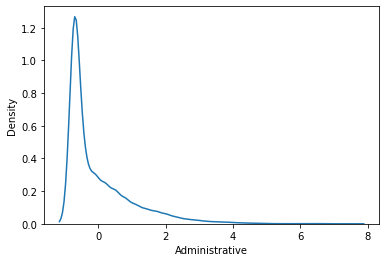

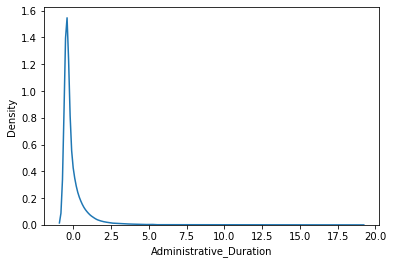

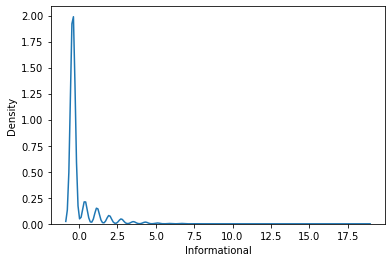

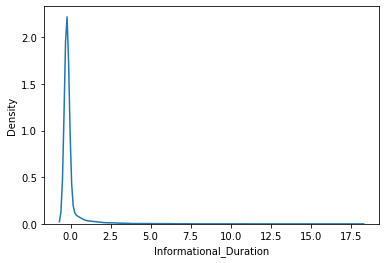

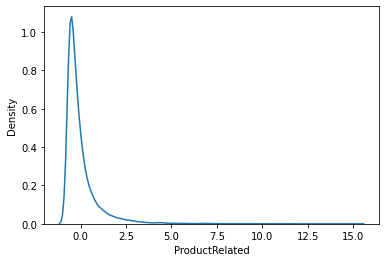

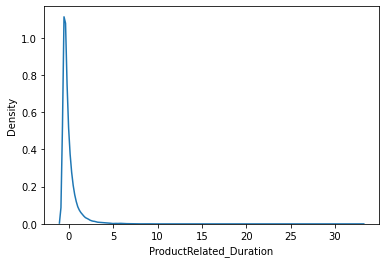

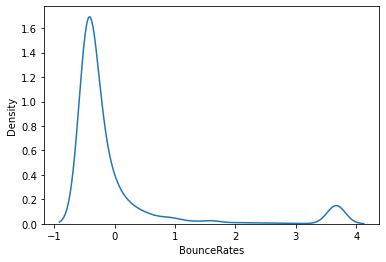

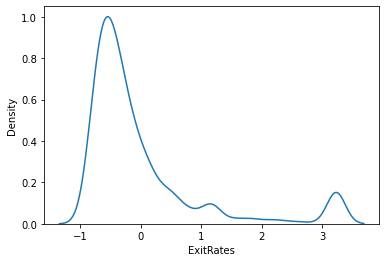

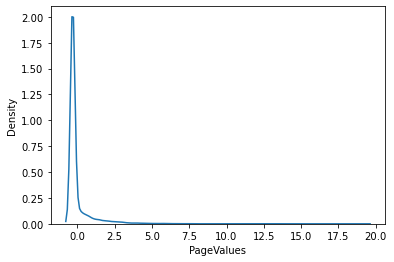

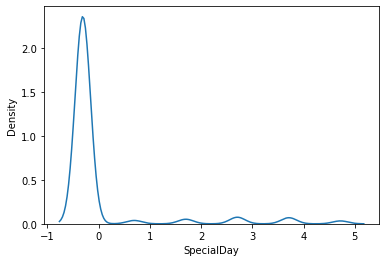

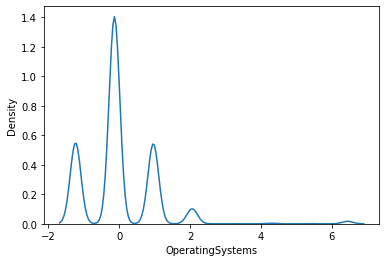

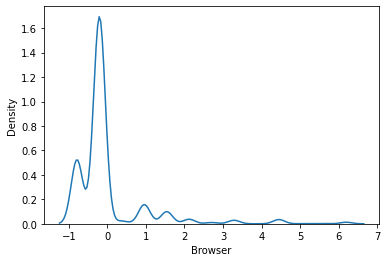

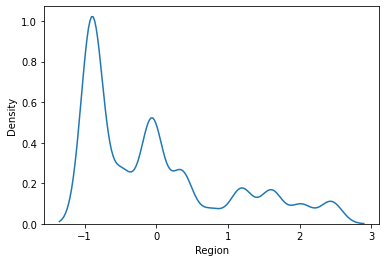

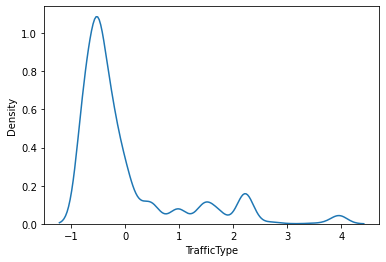

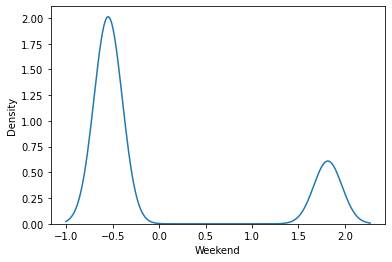

In [23]:
## Univariate Analysis of numerical values

for i in df_num:
    sns.kdeplot(df_num[i])
    plt.show()

<AxesSubplot:>

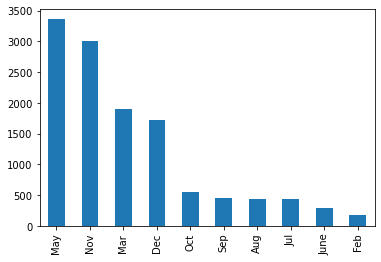

In [24]:
## Univariate Analysis of Categorical Values

df['Month'].value_counts().plot(kind='bar')

<AxesSubplot:>

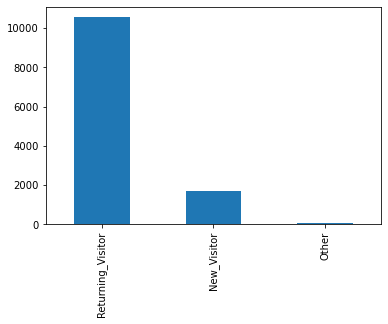

In [25]:
df['VisitorType'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Revenue', ylabel='Density'>

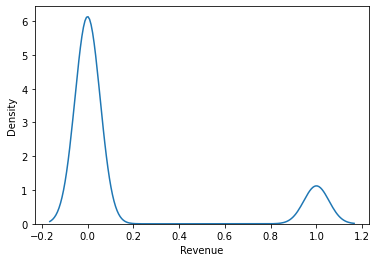

In [28]:
## Univariate Analysis of Target Variable

sns.kdeplot(df['Revenue'])

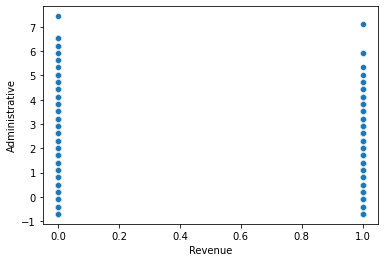

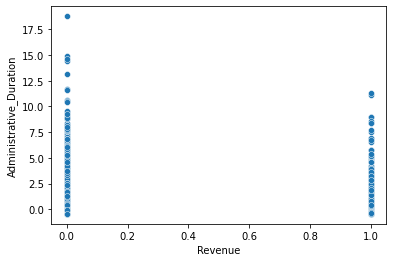

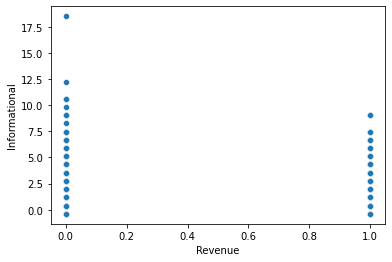

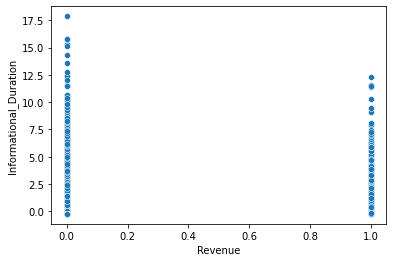

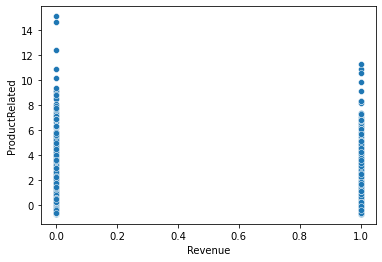

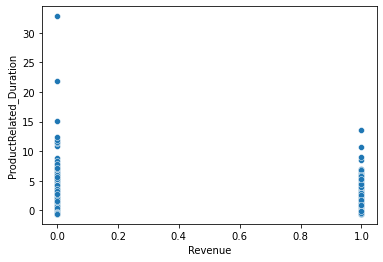

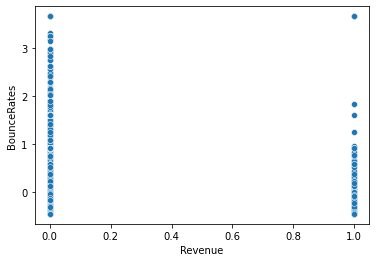

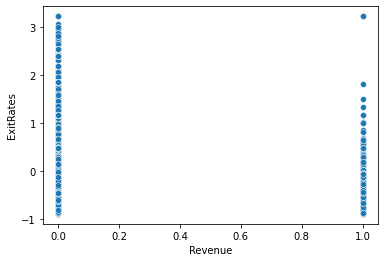

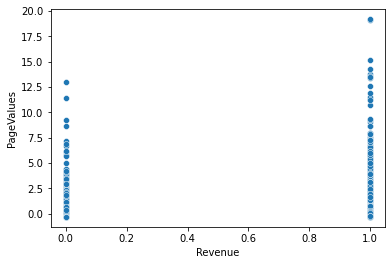

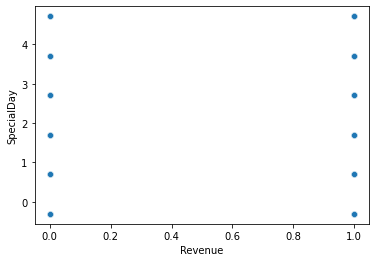

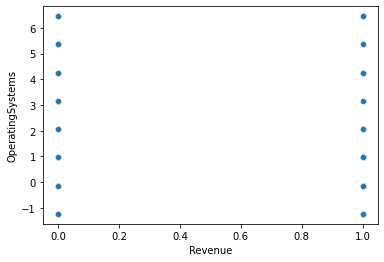

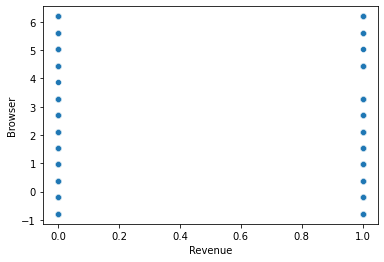

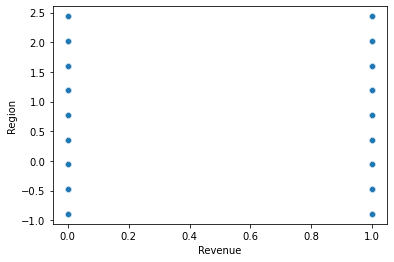

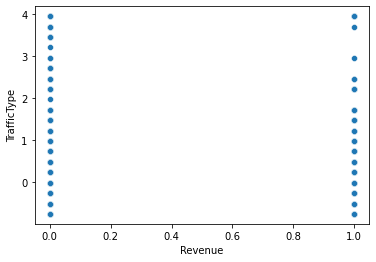

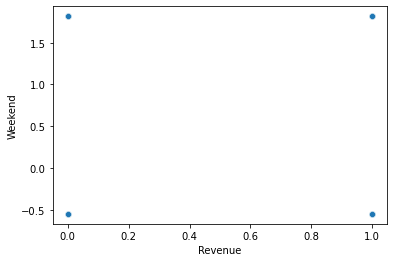

In [29]:
## Bivariate Analysis with target variable (Revenue)

for i in df_num:
    sns.scatterplot(x=df['Revenue'], y=df_num[i])
    plt.show()

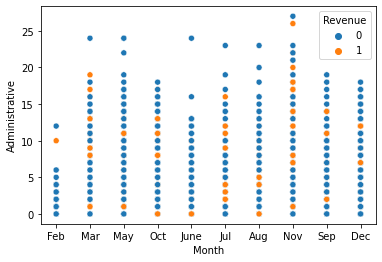

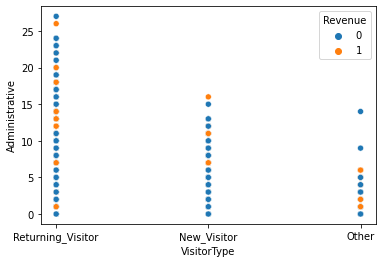

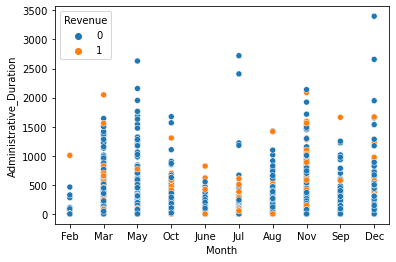

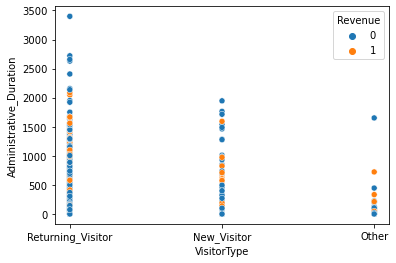

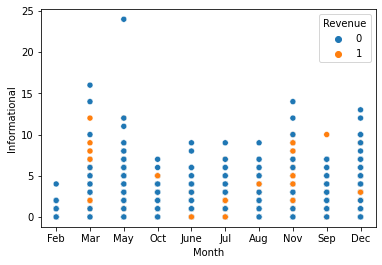

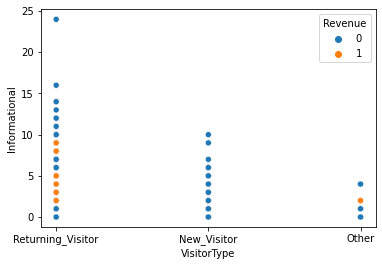

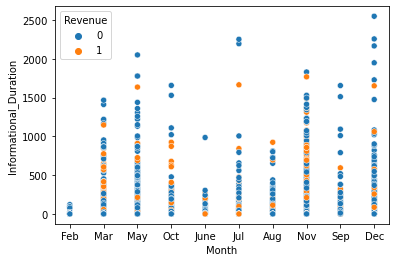

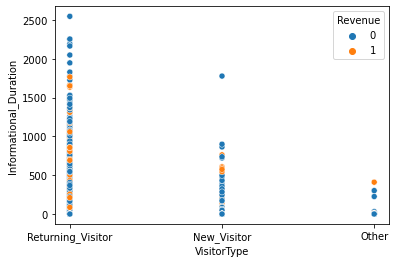

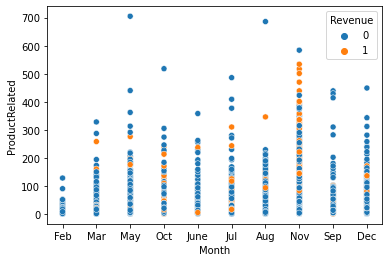

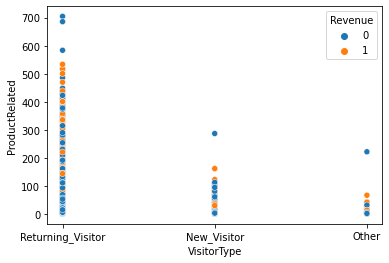

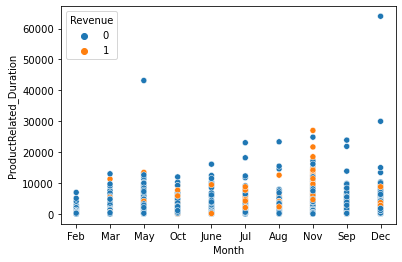

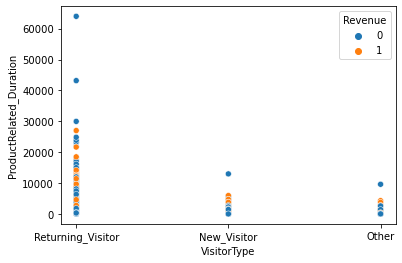

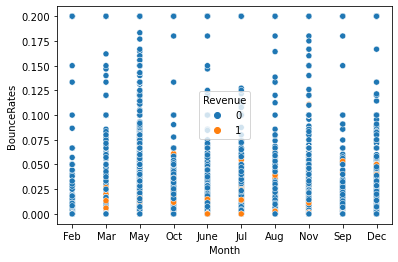

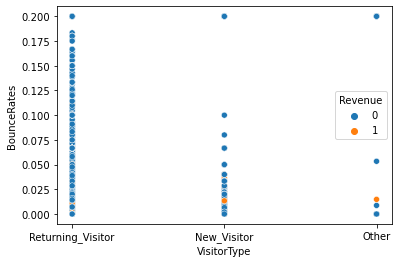

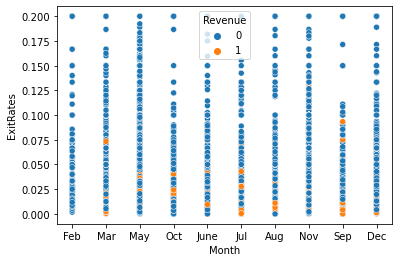

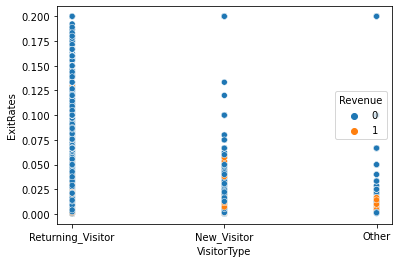

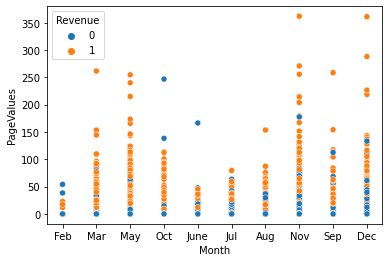

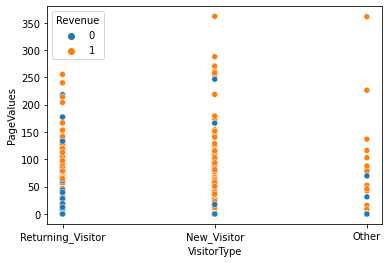

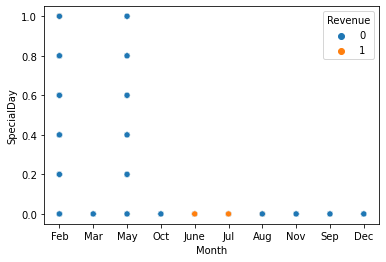

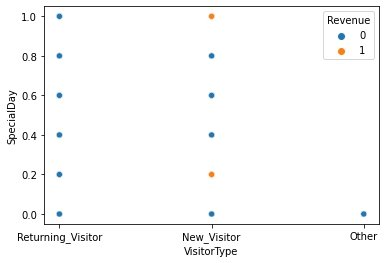

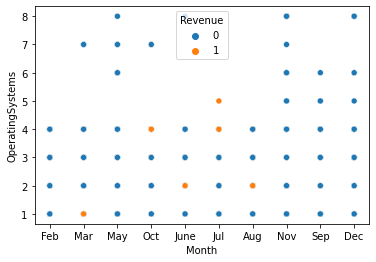

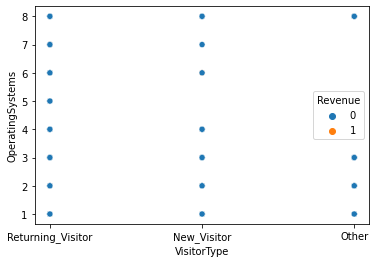

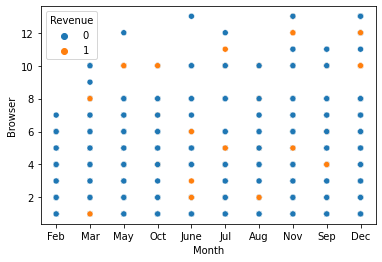

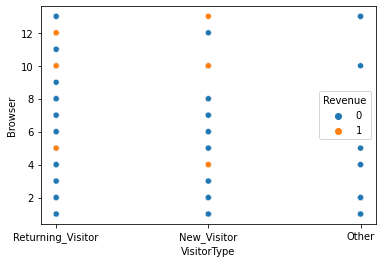

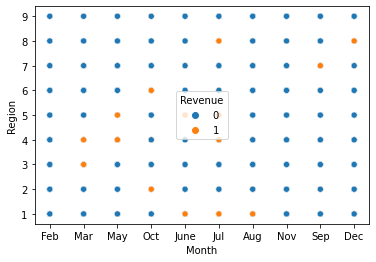

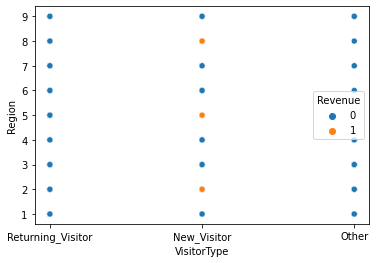

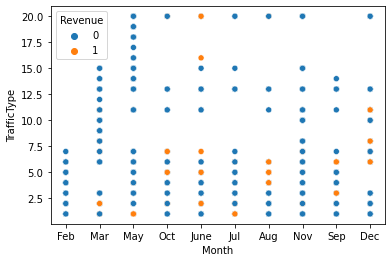

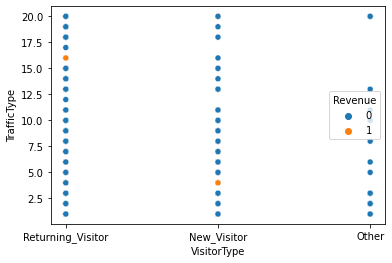

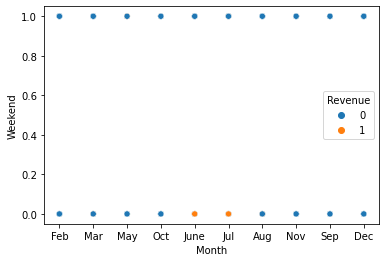

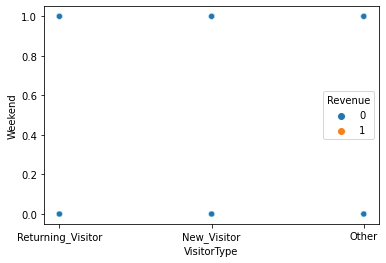

In [30]:
## Multivariate Analysis with target variable

df_categorical = df.select_dtypes(include='object')

for i in df_num:
    for j in df_categorical:
        sns.scatterplot(x=df[j], y=df[i], hue=df['Revenue'])
        plt.show()

In [31]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)

wcss

[196204.81403081943,
 172455.7646019595,
 152794.11465135578,
 142694.40624070758,
 132912.84680003155,
 126122.65406565288,
 119616.19775146802,
 114361.88536001308,
 108207.22081841782,
 103101.21910634916]

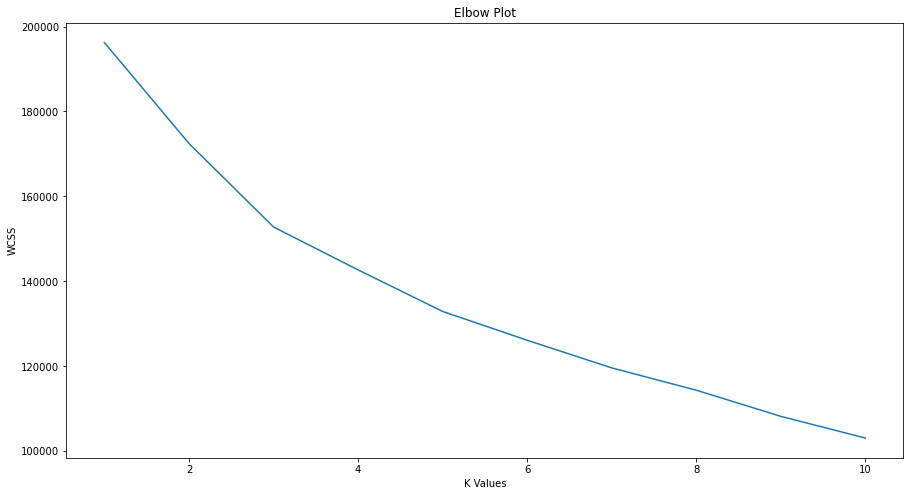

In [32]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.plot(range(1, 11), wcss)
plt.show()

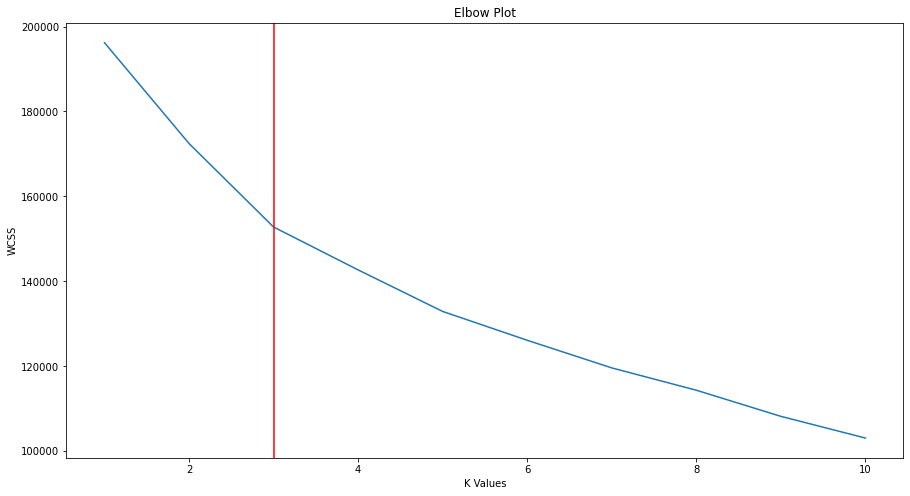

In [33]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.plot(range(1, 11), wcss)
plt.axvline(x=3, color='red')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

ss = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=10)
    km.fit(X)
    ss.append(silhouette_score(X, km.labels_))

ss

[0.2826348432711994,
 0.270250244887197,
 0.1523223526951989,
 0.1649507055774524,
 0.1678785060148398,
 0.16829753035309464,
 0.15614181143847955,
 0.17437550069596494,
 0.16200781179694868]

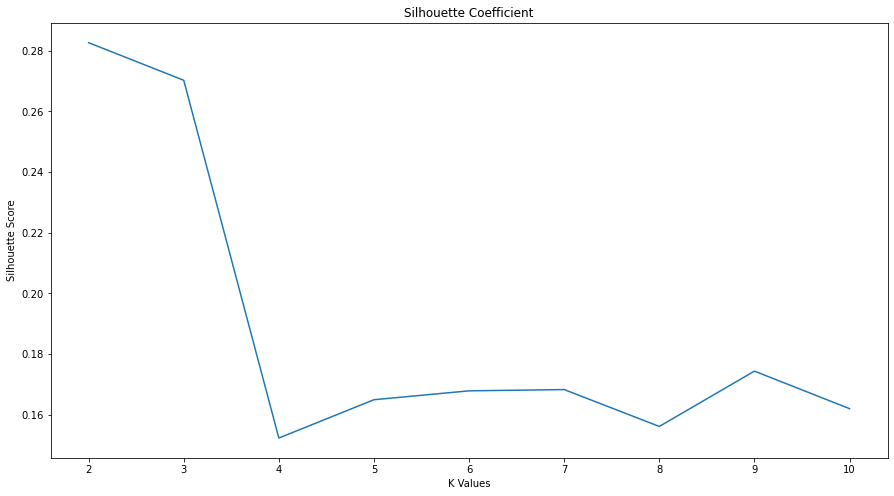

In [35]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')
plt.plot(range(2, 11), ss)
plt.show()

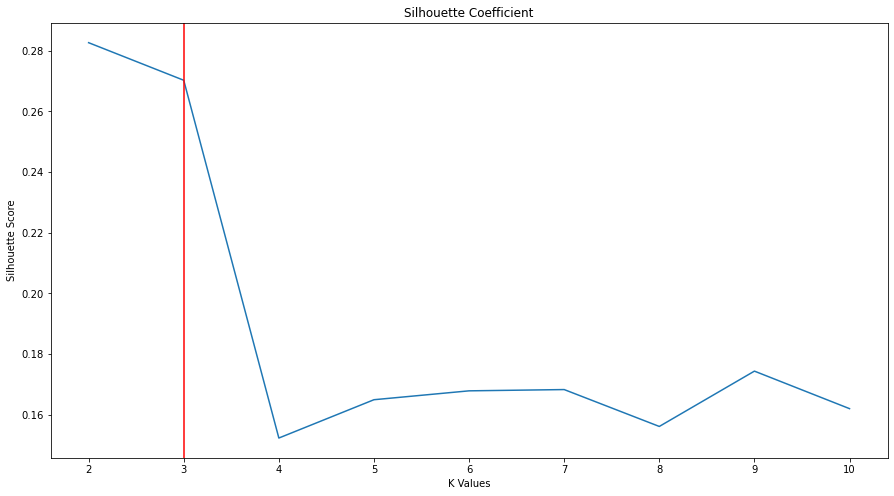

In [36]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')
plt.plot(range(2, 11), ss)
plt.axvline(x=3, color='red')
plt.show()

It is very clear that the best k value is 3

In [37]:
km_best = KMeans(n_clusters=3, random_state=10)
km_best.fit(X)

KMeans(n_clusters=3, random_state=10)

In [38]:
df['Cluster'] = km_best.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,2


In [39]:
df['Cluster'].value_counts()

2    9653
1    1619
0    1058
Name: Cluster, dtype: int64

In [40]:
from scipy.cluster.hierarchy import linkage

In [41]:
link_mat = pd.DataFrame(linkage(X, method='ward'),
                        columns=[
                            '1st OBservation', '2nd Observation',
                            'Euclidean Distance', 'No. of Observations'
                        ])
link_mat

,1st OBservation,2nd Observation,Euclidean Distance,No. of Observations
0,85.0,158.0,0.000000,2.0
1,4224.0,4489.0,0.000000,2.0
2,10037.0,11043.0,0.000000,2.0
3,2619.0,3891.0,0.000000,2.0
4,3956.0,5056.0,0.000000,2.0
...,...,...,...,...
12324,24651.0,24652.0,116.170701,7005.0
12325,24638.0,24654.0,124.175621,8859.0
12326,24635.0,24655.0,147.599310,9833.0
12327,24653.0,24656.0,180.871052,11623.0


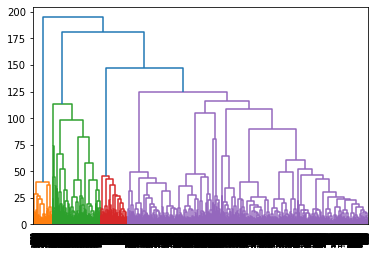

In [42]:
from scipy.cluster.hierarchy import dendrogram

dendrogram(link_mat)
plt.show()

<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

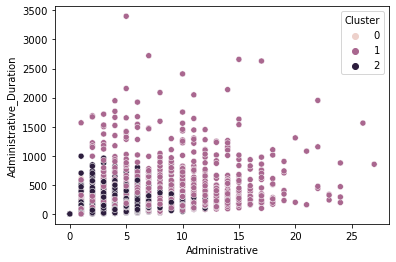

In [43]:
sns.scatterplot(x=df['Administrative'],
                y=df['Administrative_Duration'],
                hue=df['Cluster'])

## Size of cluster

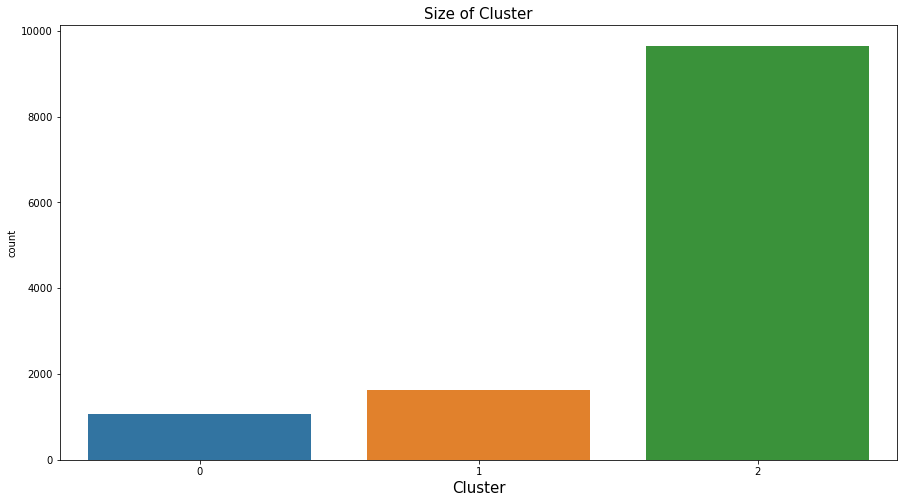

In [45]:
plt.figure(figsize = (15,8))

# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)

# display the plot
plt.show()

In [47]:
Cluster0 = df[df['Cluster'] == 0]


In [48]:
Cluster0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0
mean,0.051985,1.491808,0.016068,0.091871,3.120983,57.431519,0.165779,0.179846,0.0,0.113233,2.184310,2.314745,3.051040,5.050095,0.165406,0.005671,0.0
std,0.322802,22.044387,0.152949,1.514893,4.596543,194.431858,0.051625,0.031544,0.0,0.254969,1.061523,1.822333,2.357629,4.984018,0.371723,0.075128,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087179,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,0.150000,0.0,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,24.750000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,8.000000,0.000000,0.000000,0.0
max,5.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,0.0


In [49]:
Cluster1 = df[df['Cluster'] == 1]
Cluster1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
count,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.000000,1619.0
mean,7.361952,306.984169,2.538604,213.799873,96.925880,3838.292922,0.006267,0.019439,9.706110,0.029154,2.113033,2.224830,2.924027,3.584311,0.258802,0.281038,1.0
std,4.530347,356.142829,2.292345,325.417014,82.837992,3760.504141,0.007547,0.011825,20.046334,0.139892,0.785497,1.448362,2.275203,3.591402,0.438112,0.449645,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,27.375000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0
25%,4.000000,91.992424,1.000000,7.000000,40.000000,1561.275476,0.000690,0.011402,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.0
50%,7.000000,197.708333,2.000000,94.500000,76.000000,2807.149729,0.004038,0.017541,1.795451,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.0
75%,10.000000,369.583333,4.000000,263.000000,128.500000,5051.615834,0.008812,0.025014,10.594881,0.000000,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.0
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.062222,0.100000,246.758590,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.0


In [50]:
Cluster2 = df[df['Cluster'] == 2]
Cluster2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster
count,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.000000,9653.0
mean,1.716772,51.580624,0.215684,8.163832,23.932871,876.024252,0.009124,0.032046,5.894578,0.061162,2.119238,2.383922,3.195380,4.043510,0.235574,0.149902,2.0
std,2.334707,92.077241,0.611309,36.562960,22.595743,942.089085,0.015117,0.024867,19.152131,0.199182,0.913008,1.745790,2.424695,3.958233,0.424379,0.356993,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,219.500000,0.000000,0.013793,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.0
50%,1.000000,4.000000,0.000000,0.000000,17.000000,562.000000,0.000000,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.0
75%,3.000000,69.600000,0.000000,0.000000,32.000000,1204.416667,0.012903,0.043075,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,2.0
max,14.000000,993.000000,5.000000,844.000000,176.000000,7515.583333,0.100000,0.133333,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,2.0


## Covariance Matrix

In [54]:
cov_mat = np.cov(X.T)
cov_mat

array([[ 1.20456481e-01, -2.09035107e-03, -4.90778078e-03,
        -3.27185385e-03, -2.16646712e-02, -3.82170707e-02,
        -3.40590897e-02, -6.23697140e-03, -5.08955044e-03,
         4.06314259e-03, -1.19899890e-02, -5.01291873e-03,
        -1.73196045e-03,  9.79438290e-04,  3.57990470e-03,
        -1.17692030e-02, -6.09582404e-03, -5.89999357e-03,
        -5.10217685e-03,  7.12150830e-03, -4.32585367e-02,
         1.99230487e-02,  2.08910781e-02,  1.43711786e-02,
        -4.38428186e-05, -6.85482521e-03],
       [-2.09035107e-03,  1.47014500e-02, -5.22890366e-04,
        -3.48593578e-04, -2.30822206e-03, -4.07176665e-03,
        -3.62876231e-03, -6.64506507e-04, -5.42256676e-04,
        -1.02883521e-04,  2.07218200e-03, -7.96018981e-03,
        -5.39872658e-03, -4.89533209e-03, -3.40238995e-03,
        -6.89490809e-03, -5.64440561e-03,  7.64270549e-03,
         9.54377603e-03, -4.01796611e-03,  1.29252901e-02,
        -3.36593602e-03, -1.54480516e-03, -3.00982677e-03,
        -4.81

## Compute Eigenvalues and Eigenvectors

In [52]:
from numpy.linalg import eig

In [55]:
eigenvalues, eigenvectors = eig(cov_mat)

print(eigenvalues)
print(eigenvectors)

[3.41829578 1.69645007 1.40521137 1.1058699  1.03363415 0.98648739
 0.97726393 0.96688659 0.92128474 0.85826077 0.75179947 0.42173128
 0.35193337 0.20695207 0.16680508 0.14848343 0.12256124 0.11236077
 0.07363061 0.06258775 0.00353064 0.00517247 0.01578132 0.02520959
 0.04055631 0.03534978]
[[ 6.96667353e-04 -1.12600462e-02 -2.05330730e-02 -4.15604868e-02
   8.65839111e-03  2.48029202e-02  2.23903576e-02  2.29691866e-03
  -1.27035238e-02 -1.88617843e-03  4.77976335e-03  1.17444081e-02
  -5.84742708e-04  1.48953433e-01  3.26797368e-01  7.03382358e-01
   1.46477460e-02  2.75433019e-01  6.05699692e-02  4.11850897e-01
   3.10035970e-01 -1.08420129e-02 -1.02382069e-01 -9.61270252e-02
   8.26060672e-02 -1.77975173e-02]
 [ 5.55334628e-03  4.03644491e-03  4.78689406e-03  7.68535149e-03
  -8.54498423e-04  1.79197686e-03 -4.87598317e-03 -1.45183107e-03
   2.05559176e-03 -5.75454780e-03  9.10072772e-04  2.29028113e-03
  -7.78531467e-04 -1.19886749e-02  2.65234546e-02  3.94555084e-03
  -1.00130532

In [56]:
eigenvalues.tolist()

[3.418295781992279,
 1.6964500742664177,
 1.4052113738254928,
 1.1058698985795425,
 1.0336341470210566,
 0.9864873944102696,
 0.9772639320921065,
 0.9668865928385398,
 0.9212847445942595,
 0.8582607655159847,
 0.7517994658042421,
 0.42173127792128456,
 0.351933371050295,
 0.2069520696853371,
 0.16680507823773758,
 0.1484834257856472,
 0.12256123759189726,
 0.11236076953394204,
 0.0736306113740455,
 0.06258775216218446,
 0.003530640241629275,
 0.0051724695614707465,
 0.01578132184236037,
 0.025209586370319826,
 0.04055631294277184,
 0.03534977667218837]

Accorind to Kaiser criterion, there are 4 eigenvalues higher than 1, so the optimum number of PCAs should be 4

In [58]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [78]:
X_pca = pd.DataFrame(pca.fit_transform(X),
                     columns=['PC1', 'PC2', 'PC3', 'PC4'])
X_pca.head()

,PC1,PC2,PC3,PC4
0,-3.174502,3.613160,-1.897338,-0.937676
1,-1.372659,-0.009855,-0.825877,-0.035229
2,-3.315314,3.517440,1.291702,-1.494788
3,-1.990295,1.110744,0.187483,-0.324006
4,-0.930608,-0.375368,0.279202,-0.097779


In [79]:
wcss_pca = []

for i in range(1, 8):
    km_pca = KMeans(n_clusters=i, random_state=10)
    km_pca.fit(X_pca)
    wcss_pca.append(km_pca.inertia_)

wcss_pca

[94018.82256631265,
 70432.81927775514,
 51382.14330219541,
 44380.497187098386,
 38494.75523141563,
 33003.32790010244,
 28626.97588017558]

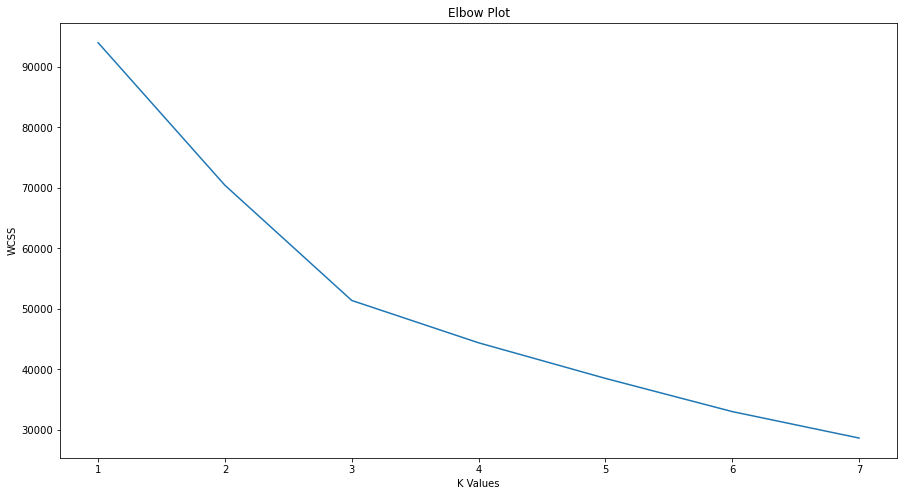

In [80]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.plot(range(1, 8), wcss_pca)
plt.show()

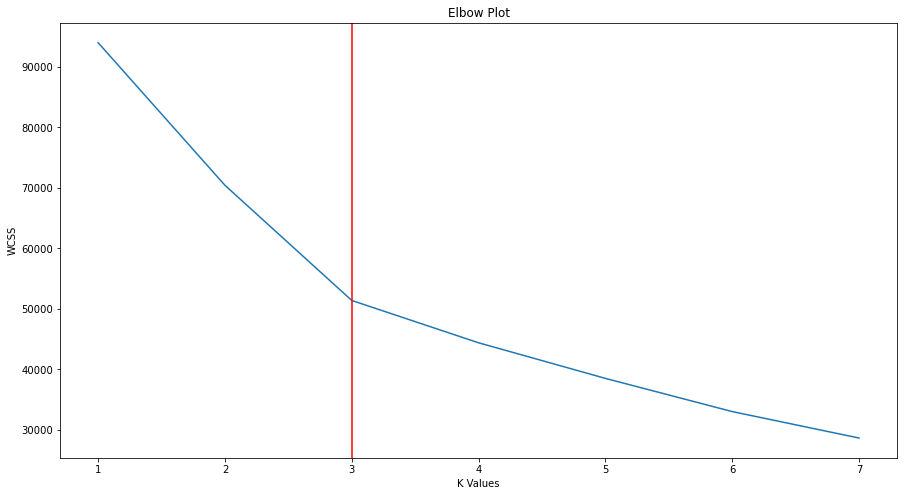

In [81]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.plot(range(1, 8), wcss_pca)
plt.axvline(x=3, color='red')
plt.show()

In [82]:
ss_pca = []

for i in range(2, 8):
    km_pca = KMeans(n_clusters=i, random_state=10)
    km_pca.fit(X_pca)
    ss_pca.append(silhouette_score(X_pca, km_pca.labels_))

ss_pca

[0.41136900166027973,
 0.46279502672527884,
 0.319538789086392,
 0.31859878642909234,
 0.30146520048611763,
 0.2833390520683312]

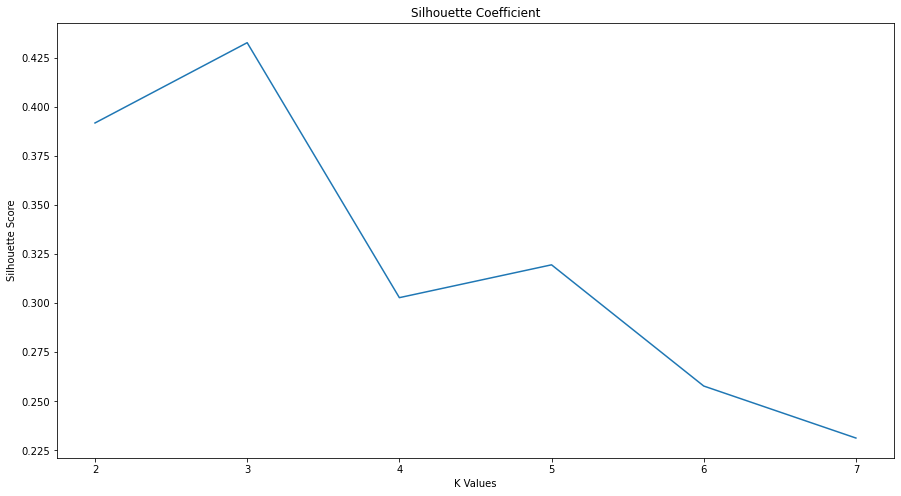

In [65]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')
plt.plot(range(2, 8), ss_pca)
plt.show()

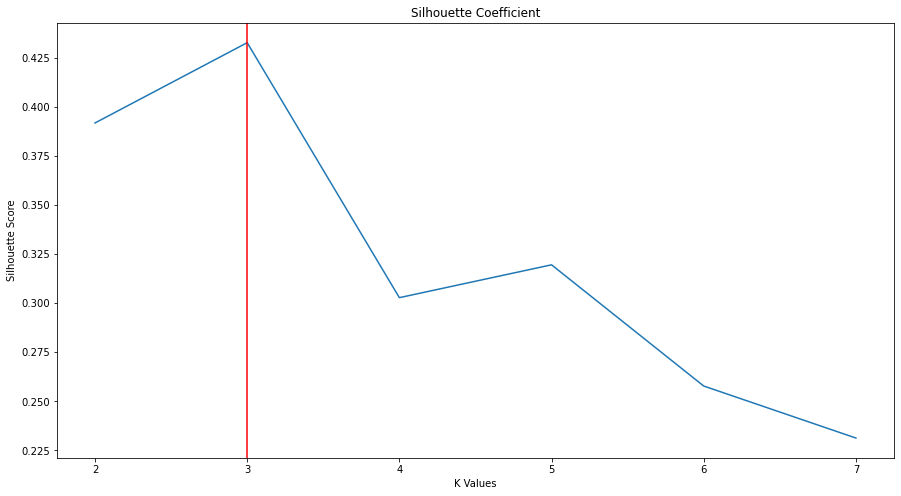

In [66]:
plt.figure(figsize=(15, 8))
plt.xlabel('K Values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Coefficient')
plt.plot(range(2, 8), ss_pca)
plt.axvline(x=3, color='red')
plt.show()

In [67]:
km_pca_best = KMeans(n_clusters=3, random_state=10)
km_pca_best.fit(X_pca)

KMeans(n_clusters=3, random_state=10)

In [68]:
df['Cluster_pca'] = km_pca_best.labels_
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster,Cluster_pca
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,2,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,2,1


<AxesSubplot:xlabel='Administrative', ylabel='Administrative_Duration'>

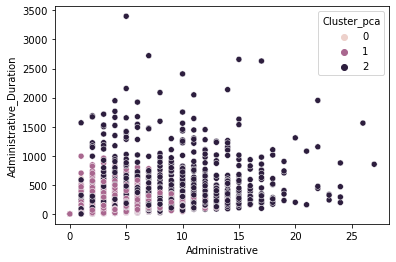

In [69]:
sns.scatterplot(x=df['Administrative'],
                y=df['Administrative_Duration'],
                hue=df['Cluster_pca'])

In [70]:
Cluster_pca0 = df[df['Cluster_pca'] == 0]
Cluster_pca0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster,Cluster_pca
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.0
mean,0.045584,1.388097,0.016144,0.092308,3.121557,61.420905,0.166206,0.179967,0.0,0.111491,2.190883,2.316239,3.048433,5.127255,0.153846,0.005698,0.018993,0.0
std,0.278869,21.819071,0.153308,1.518475,4.567870,203.583128,0.051359,0.031649,0.0,0.252725,1.062063,1.821318,2.356637,5.024933,0.360973,0.075306,0.194066,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087179,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.120000,0.155556,0.0,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.200000,0.0,0.000000,2.000000,2.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.0
75%,0.000000,0.000000,0.000000,0.000000,3.000000,25.000000,0.200000,0.200000,0.0,0.000000,3.000000,2.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.0
max,4.000000,613.666667,2.000000,34.200000,71.000000,2251.280000,0.200000,0.200000,0.0,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,2.000000,0.0


In [71]:
Cluster_pca1 = df[df['Cluster_pca'] == 1]
Cluster_pca1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster,Cluster_pca
count,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.000000,9726.0
mean,1.765268,53.234870,0.224450,8.359557,23.996813,874.946717,0.009136,0.032028,5.990548,0.061526,2.118548,2.383508,3.195558,4.026116,0.236685,0.150730,1.988896,1.0
std,2.406442,94.777237,0.632051,35.969567,22.529069,932.608312,0.015156,0.024968,19.381056,0.199800,0.912090,1.746315,2.424088,3.942822,0.425069,0.357804,0.118604,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,8.000000,219.558333,0.000000,0.013772,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.0
50%,1.000000,4.000000,0.000000,0.000000,17.000000,565.398333,0.000000,0.025000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,3.000000,72.000000,0.000000,0.000000,32.000000,1207.490000,0.012903,0.042936,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000,2.000000,1.0
max,16.000000,993.000000,5.000000,686.000000,176.000000,7515.583333,0.100000,0.133333,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,2.000000,1.0


In [72]:
Cluster_pca2 = df[df['Cluster_pca'] == 2]
Cluster_pca2.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Cluster,Cluster_pca
count,1551.00000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.0
mean,7.30432,307.717249,2.584784,221.561841,99.657640,3969.576344,0.006286,0.019390,9.252407,0.026821,2.112830,2.219213,2.912315,3.624113,0.260477,0.281109,1.006447,2.0
std,4.59104,362.375740,2.307715,330.680463,83.587479,3798.046985,0.007556,0.011647,18.729935,0.134222,0.785865,1.430873,2.272142,3.637072,0.439037,0.449686,0.080063,0.0
min,0.00000,0.000000,0.000000,0.000000,1.000000,27.375000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.0
25%,4.00000,88.095238,1.000000,9.000000,41.500000,1645.306097,0.000844,0.011440,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,2.0
50%,7.00000,195.400000,2.000000,101.500000,80.000000,2946.600000,0.004038,0.017471,1.722165,0.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.0
75%,10.00000,369.583333,4.000000,277.316667,131.000000,5245.856397,0.008834,0.024988,10.122795,0.000000,2.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,2.0
max,27.00000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.066667,0.100000,214.306663,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,2.000000,2.0


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    df['Cluster'],
                                                    test_size=0.3,
                                                    random_state=10)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, df['Cluster'], test_size=0.3, random_state=10)

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9851311165179778

In [75]:
rf = RandomForestClassifier()
rf.fit(X_pca_train, y_pca_train)
rf.score(X_pca_test, y_pca_test)

0.9935117599351176

We can see that the accuracy of the model is better after incorporating PCA into it